In [160]:
# Importing Libraries
library(tidyverse)
library(repr)
library(tidymodels)

In [191]:
player_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/players.csv"
sessions_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/sessions.csv"

player_data <- na.omit(read_csv(player_data_url))
sessions_data <- na.omit(read_csv(sessions_data_url))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [192]:
head(player_data)
player_mean_quantitative_data <- player_data |>
    summarize(mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours, na.rm = TRUE))
player_mean_quantitative_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.904639


## **Chosen Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### **Specific Question:** Can [explanatory variable(s)] predict [response variable] in [dataset]?

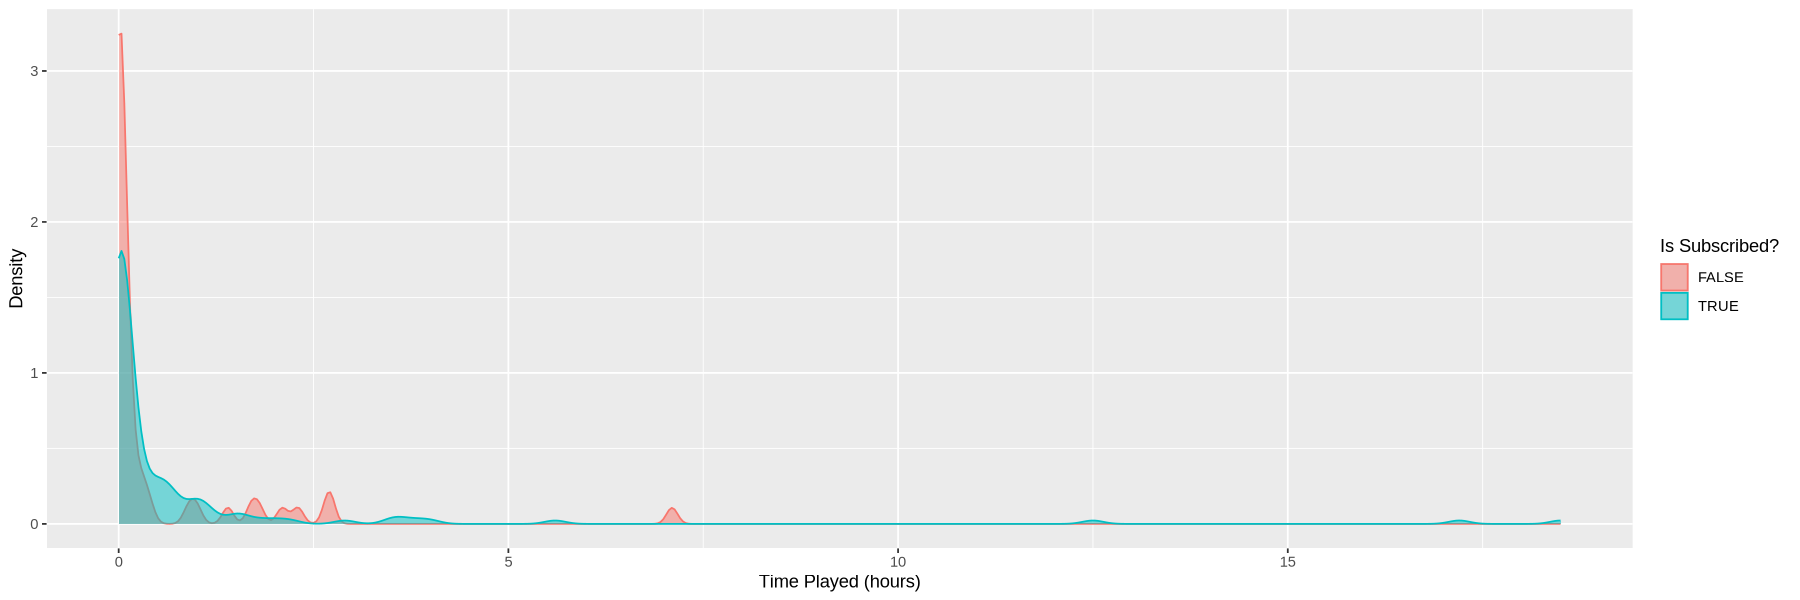

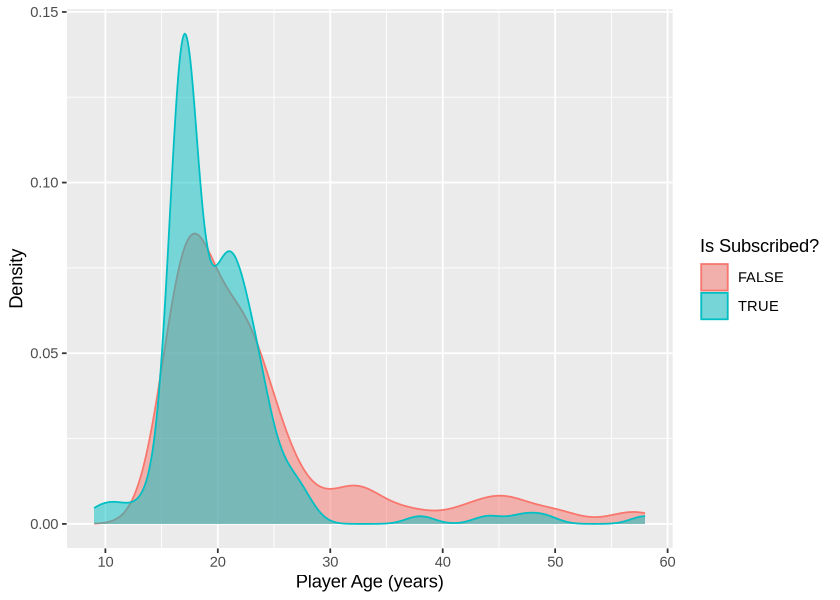

In [193]:
options(repr.plot.width = 15, repr.plot.height = 5)
player_time_plot <- player_data |>
    select(played_hours, subscribe) |>
    filter(played_hours >= 0, played_hours <= 20) |>
    ggplot(aes(x=played_hours, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Time Played (hours)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

player_time_plot

options(repr.plot.width = 7, repr.plot.height = 5)
player_age_plot <- player_data |>
    select(Age, subscribe) |>
    ggplot(aes(x=Age, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(x="Player Age (years)",y="Density",fill = "Is Subscribed?", colour = "Is Subscribed?")

player_age_plot

In [198]:
tail(sessions_data)
sessions_wrangled_data <- sessions_data |>
    mutate(session_length = as.POSIXct(end_time,format = "%d/%m/%Y %H:%M") - as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    select(hashedEmail, session_length) |>
    group_by(hashedEmail) |>
    summarize(average_session_length = mean(session_length))
sessions_wrangled_data


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,28/08/2024 23:31,29/08/2024 00:15,1.72489e+12,1.72489e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


hashedEmail,average_session_length
<chr>,<drtn>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.000000 mins
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.000000 mins
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.000000 mins
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.153846 mins
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,35.000000 mins
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10.000000 mins
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,50.000000 mins
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,29.682927 mins
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,18.000000 mins
